In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from collections import defaultdict

In [121]:
df_original = pd.read_csv('zomato.csv' , encoding = 'latin-1')
df = df_original.copy()
pd.set_option('display.max_rows', None , 'display.max_columns' , None)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [122]:
df.shape

(9551, 21)

In [123]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [124]:
## Cuisines have 9 NaN values as shown 
df_original.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [125]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

### 1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

Rest of India  :  705 Restaurants
Delhi-NCR  :  7947 Restaurants


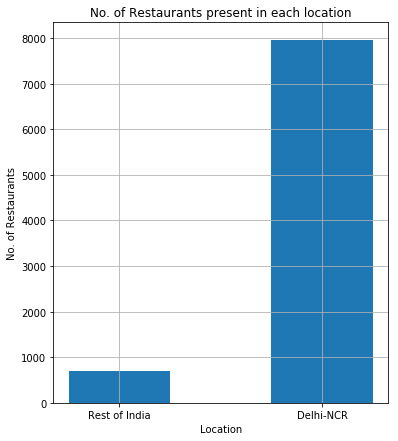

In [126]:
## Cities in Delhi NCR storing in a list
l = ['New Delhi' , 'Ghaziabad' , 'Noida' , 'Faridabad' , 'Gurgaon']

## Copying dataset object to prevent unwanted changes in dataset and also taking country code of India
df = df_original.copy()
df = df[df['Country Code'] == 1]

## d is a dictionary which will have 2 keys as 'Delhi-NCR' and 'Rest of india' and no. of restaurants as value
d = {}

## converting City column to string and trimming extra spaces
def convert(city):
    return str(city).strip()
df.City = df.City.apply(convert)

## Iterating in City column , and filling dict d 
for city in df['City']:
    if city in l:
        d['Delhi-NCR'] = d.get('Delhi-NCR' , 0) + 1
    else:
        d['Rest of India'] = d.get('Rest of India' , 0) + 1

## location will store Delhi NCR & Rest Of India as 2 elements , count will store respective no. of restaurants in each
location = []
count = []       
for key in d:
    print(key , ' : ' ,d[key] , 'Restaurants')
    location.append(key)
    count.append(d[key])

## Setting graph size and plotting bar graph  
plt.rcParams['figure.figsize'] = (6,7)
plt.bar(location , count , width = 0.5)
plt.title('No. of Restaurants present in each location')
plt.xlabel('Location')
plt.ylabel('No. of Restaurants')
plt.grid()
plt.show()        

### 1.2 Cuisines which are not present in restaurants of Delhi NCR but present in rest of India .

In [127]:
## these sets will store cuisines which are present in restaurants of Delhi NCR and 
## cuisines which are not present in delhi ncr but are present in rest of india respectively .
cuisines_ncr = set()
cuisines_not_ncr = set()

## iterating in City , Cuisines using zip as zip is faster than iterrows()
for city,cui in zip(df['City'] , df['Cuisines']):
## in this loop adding cuisines present in Delhi NCR to the set
    if city in l:
        cui = cui.split(',')
        cui = list(map(str.strip , cui))
        for c in cui:
            if c not in cuisines_ncr:
                    cuisines_ncr.add(c)

## in this loop , if a cuisine is not in Delhi NCR then it is added to the cuisines_not_ncr set as we are iterating in
## cities which are not in delhi NCR i.e. which are in rest of india
for city ,cui in zip(df['City'] , df['Cuisines']):
    if city not in l:
        cui = cui.split(',')
        cui = list(map(str.strip , cui))
        for c in cui:
            if c not in cuisines_ncr:
                cuisines_not_ncr.add(c)

print('Cuisines which are not present in restaurants of Delhi NCR but present in rest of India are as follows :')
print()
print(cuisines_not_ncr)

## Note :- Malwani and BBQ are actually present in Delhi NCR on searching over Zomato api but no such restaurants  
## serving these cuisines present in  this dataset , ex : check restaurant with res_id 19272139 or 19238917 
## having Malwani and BBQ cuisines respectively in Delhi NCR on zomato api but these are not present in this dataset . 
## So this is due to the incomplete dataset here that these cuisines show up .
## So , actually according to zomato api answer is 'German' , 'Cajun' only .

Cuisines which are not present in restaurants of Delhi NCR but present in rest of India are as follows :

{'German', 'BBQ', 'Cajun', 'Malwani'}


### 1.3 Top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [128]:
''' Here i am considering different branches of a Restaurant located at different places as separate restaurants
as each restaurant have separate restaurant id . ex : if A Restaurant named "736 AD bar and lounge" has 3 branches 
each serving different or same cuisines then these 3 branches are being treated as 3 different restaurants'''

## ncr and roi will store cuisine as key and no. of restaurants serving it as its value for Delhi NCR and Rest Of India
## respectively .
ncr = {}
roi = {}
for city,cui in zip(df['City'] , df['Cuisines']):
    location = city

    ## As multiple cuisines are served by a restaurant which are separated by ','
    cui = cui.split(',')
    cui = list(map(str.strip , cui))

    ## filling both dictionaries according to the location is in Delhi NCR or not .
    if location in l:    
        for c in cui:
            ncr[c] = ncr.get(c,0) + 1
    else:
        for c in cui:
            roi[c] = roi.get(c,0) + 1

## sorting both dict in descending order of no. of restaurants,i.e.Cuisines served in more restaurants will show at top  
ncr = {k: v for k, v in sorted(ncr.items(), key=lambda item: item[1] , reverse = True)}
roi = {k: v for k, v in sorted(roi.items(), key=lambda item: item[1] , reverse = True)}

## these 4 lists each store cuisine , its count in NCR and rest of India (roi) respectively
ncr_cuisine = []
ncr_cuisine_count = []
roi_cuisine = []
roi_cuisine_count = []

## below 2 loops terate in both dict and print top 10 cuisines in NCR and Rest Of India
count = 0
print('Top 10 cuisines served in Delhi NCR :')
print()
for k,v in ncr.items():
    if(count == 10):
        break
    print(k , ':' , v , 'Restaurants')
    ncr_cuisine.append(k)
    ncr_cuisine_count.append(v)
    count += 1

print()

count = 0
print('Top 10 cuisines served in Rest of india :')
print()
for k,v in roi.items():
    if(count == 10):
        break
    print(k , ':' , v , 'Restaurants')
    roi_cuisine.append(k)
    roi_cuisine_count.append(v)
    count += 1
## converting lists to numpy arrays to make calculation of percentage share of each cusine easy further . 
ncr_cuisine_count = np.array(ncr_cuisine_count)
roi_cuisine_count = np.array(roi_cuisine_count)

Top 10 cuisines served in Delhi NCR :

North Indian : 3597 Restaurants
Chinese : 2448 Restaurants
Fast Food : 1866 Restaurants
Mughlai : 933 Restaurants
Bakery : 697 Restaurants
South Indian : 569 Restaurants
Continental : 547 Restaurants
Desserts : 542 Restaurants
Street Food : 538 Restaurants
Italian : 535 Restaurants

Top 10 cuisines served in Rest of india :

North Indian : 349 Restaurants
Chinese : 242 Restaurants
Continental : 177 Restaurants
Italian : 147 Restaurants
Cafe : 136 Restaurants
Fast Food : 97 Restaurants
South Indian : 62 Restaurants
Mughlai : 59 Restaurants
Desserts : 55 Restaurants
Mexican : 50 Restaurants


### 1.4 Pie charts to show how cuisine served is different from Delhi NCR to Rest of India.

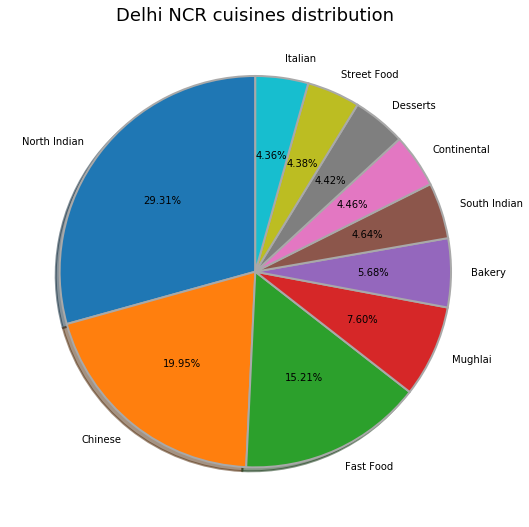

North Indian 29.31 %
Chinese 19.95 %
Fast Food 15.21 %
Mughlai 7.60 %
Bakery 5.68 %
South Indian 4.64 %
Continental 4.46 %
Desserts 4.42 %
Street Food 4.38 %
Italian 4.36 %


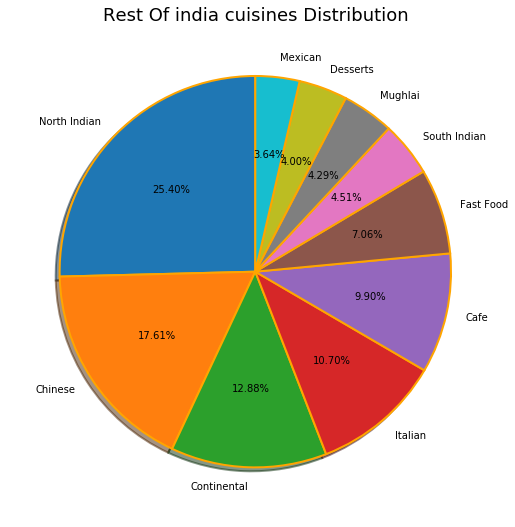

North Indian 25.40 %
Chinese 17.61 %
Continental 12.88 %
Italian 10.70 %
Cafe 9.90 %
Fast Food 7.06 %
South Indian 4.51 %
Mughlai 4.29 %
Desserts 4.00 %
Mexican 3.64 %


In [129]:
## Note : here i am considering top 10 cuisines only to show the difference in types of cuisines to make graphs more presentable

## plotting pie charts for cuisine distribution in NCR and Rest of India 
plt.rcParams['figure.figsize'] = (15,9)
plt.title('Delhi NCR cuisines distribution' , fontsize = 18)
plt.pie(ncr_cuisine_count , labels = ncr_cuisine  ,autopct='%.2f%%' , startangle = 90 ,shadow = True,wedgeprops   = { 'linewidth' : 2,'edgecolor' : "darkgrey" })
plt.show()

## calculating percentage share of each cuisine in restaurants of NCR.
peramount1 = np.true_divide(ncr_cuisine_count , ncr_cuisine_count.sum())*100

## Printing percentage share of each cuisine in restaurants of NCR.
for i in range(10):
    print(ncr_cuisine[i] , format(peramount1[i] ,'.2f') , '%')
plt.title('Rest Of india cuisines Distribution' , fontsize = 18)    
plt.pie(roi_cuisine_count , labels = roi_cuisine ,autopct='%.2f%%' , startangle = 90 ,shadow = True,wedgeprops   = { 'linewidth' : 2,'edgecolor' : "orange" })
plt.show()

## calculating percentage share of each cuisine in restaurants of Rest of India.
peramount2 = np.true_divide(roi_cuisine_count , roi_cuisine_count.sum())*100

## Printing percentage share of each cuisine in restaurants of rest Of india . 
for i in range(10):
    print(roi_cuisine[i] , format(peramount2[i] ,'.2f') , '%')

### 2.1 Influence of No. of votes of a restaurant on its User Rating 

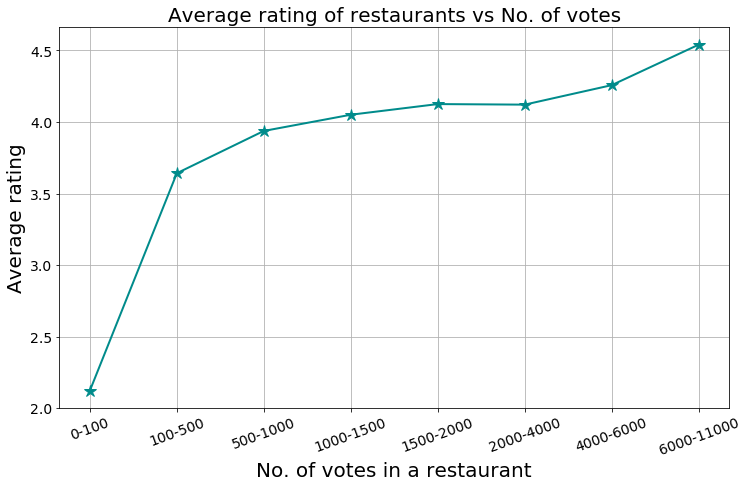

In [130]:
## Here as no. of votes range from 0-11000+ and even multiple scatter plots were not depicting proper correlation 
## between 2 required quantities , so i clubbed no. of votes in unequal groups 
## (as restaurants with more no of votes are generally less and vice -versa)
##and then plotted the graph

## considering for India only
df = df_original.copy()
df = df[df['Country Code'] == 1]

## each list will store ratings of restaurants having no. of votes in a specific range.
l1 = []
l11 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []
l7 = []

## filling each list with rating depedning upon range of no. of votes of restaurant
for v , r in zip(df['Votes'] , df['Aggregate rating']):
    if v <= 100:
        l1.append(r)
    elif v>100 and v<=500:
        l11.append(r)
    elif v> 500 and v<=1000:
        l2.append(r)
    elif v>1000 and v<=1500:
        l3.append(r)
    elif v>1500 and v<=2000:
        l4.append(r)
    elif v>2000 and v<=4000:
        l5.append(r)
    elif v>4000 and v<=6000:
        l6.append(r)
    else:
        l7.append(r)

## these variables store average rating for each list 
avg1 = mean(l1)
avg11 = mean(l11)
avg2 = mean(l2)
avg3 = mean(l3)
avg4 = mean(l4)
avg5 = mean(l5)
avg6 = mean(l6)
avg7 = mean(l7)

avg = [avg1,avg11,avg2,avg3,avg4,avg5,avg6,avg7]

## Plotting the graph with grp as range of no. of votes 
plt.rcParams['figure.figsize'] = (12,7)
grp = ['0-100' ,'100-500', '500-1000' , '1000-1500' , '1500-2000' , '2000-4000' , '4000-6000' , '6000-11000']
plt.plot(grp , avg ,'-*', linewidth = 2 , markersize = 12 , color = 'darkcyan')
plt.title('Average rating of restaurants vs No. of votes' , fontsize = 20)
plt.xticks(rotation = 20 , fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.xlabel('No. of votes in a restaurant' , fontsize = 20)
plt.ylabel('Average rating' , fontsize = 20)
plt.show()

In [131]:
## to know how Aggregate rating is distributed for no. of votes <2000 as at times mean alone may not depict clear picture 
(df[df['Votes']<2000])['Aggregate rating'].describe()

count    8576.000000
mean        2.508699
std         1.509086
min         0.000000
25%         2.000000
50%         3.100000
75%         3.500000
max         4.900000
Name: Aggregate rating, dtype: float64

In [132]:
## to know how Aggregate rating is distributed for 2000+ votes as at times mean alone may not depict clear picture 
(df[df['Votes']>=2000])['Aggregate rating'].describe()

count    76.000000
mean      4.173684
std       0.430308
min       2.400000
25%       3.975000
50%       4.200000
75%       4.400000
max       4.900000
Name: Aggregate rating, dtype: float64

### 2.2  Influence of No. of cuisines served by a restaurant on  User Rating

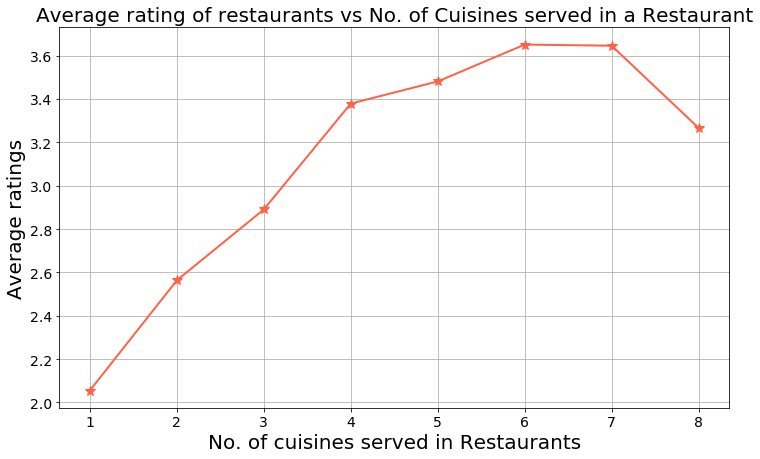

In [133]:
df = df_original.copy()
df = df[df['Country Code'] == 1]

## making a new column storing count of no. of cuisines served in a restaurant . 
df['no_of_cuisines'] = df.apply(lambda row : len(row.Cuisines.split(',')) , axis = 1) 

## calculating average rating depending upon no. of cuisines served 
x_y = df.groupby('no_of_cuisines')['Aggregate rating'].mean()
x = x_y.index
y = x_y.values

## plotting the line graph
plt.rcParams['figure.figsize'] = (12,7)
plt.grid()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Average rating of restaurants vs No. of Cuisines served in a Restaurant' , fontsize = 20)
plt.xlabel('No. of cuisines served in Restaurants' , fontsize = 20)
plt.ylabel('Average ratings' , fontsize = 20)
plt.plot(x,y , '-*' , linewidth = 2 , markersize = 10 , color = 'tomato')
plt.show()

In [134]:
## to show how the average rating is distributed for restaurants serving less than 5 cuisines 
(df[df['no_of_cuisines']<3])['Aggregate rating'].describe()

count    6241.000000
mean        2.311168
std         1.562710
min         0.000000
25%         0.000000
50%         3.000000
75%         3.400000
max         4.900000
Name: Aggregate rating, dtype: float64

In [135]:
## to show how the average rating is distributed for restaurants serving more than or equal to 5 cuisines 
(df[df['no_of_cuisines']>=5])['Aggregate rating'].describe()

## it is clear from above graph and these statistics that restaurants serving more cuisines have better rating
## also over 96% rstaurants serve less than 5 cuisines in India .

count    263.000000
mean       3.533080
std        0.775882
min        0.000000
25%        3.300000
50%        3.700000
75%        4.000000
max        4.700000
Name: Aggregate rating, dtype: float64

### 2.3 Influence of Average Cost of Restaurant on user rating .

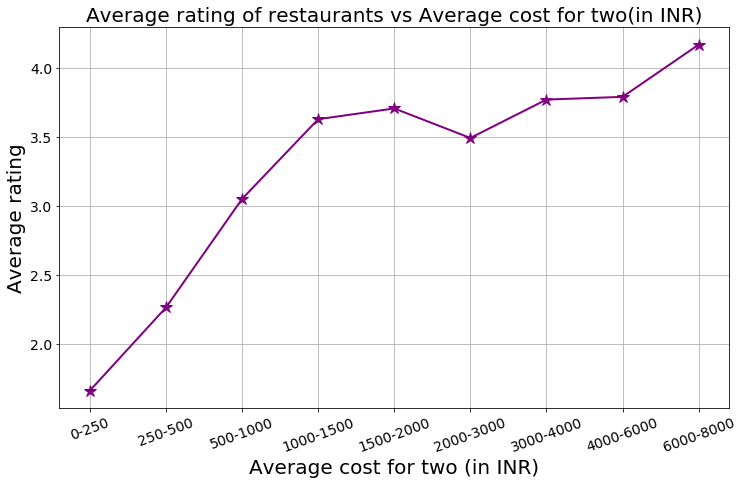

In [136]:
## Here as Average cost for two ranges from 0-8000+ and even multiple scatter plots were not depicting proper correlation 
## between 2 required quantities , so i clubbed Average cost for two in unequal groups 
## (as restaurants with more avg. cost are generally less and vice -versa)
##and then plotted the graph

df = df_original.copy()
df = df[df['Country Code'] == 1]

## each list will store ratings of restaurants having average cost for two in the given range .
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []
l7 = []
l8 = []
l9 = []

## filling each list with rating depedning upon range of avg. cost for two .
for v , r in zip(df['Average Cost for two'] , df['Aggregate rating']):
    if v <= 250:
        l1.append(r)
    elif v> 250 and v<=500:
        l2.append(r)
    elif v>500 and v<=1000:
        l3.append(r)
    elif v>1000 and v<=1500:
        l4.append(r)
    elif v>1500 and v<=2000:
        l5.append(r)
    elif v>2000 and v<=3000:
        l6.append(r)
    elif v>3000 and v<=4000:
        l7.append(r)
    elif v>4000 and v<=6000:
        l8.append(r)
    else:
        l9.append(r)
    
## these variables store average rating for each list 
avg1 = mean(l1)
avg2 = mean(l2)
avg3 = mean(l3)
avg4 = mean(l4)
avg5 = mean(l5)
avg6 = mean(l6)
avg7 = mean(l7)
avg8 = mean(l8)
avg9 = mean(l9)

avg = [avg1,avg2,avg3,avg4,avg5,avg6,avg7,avg8,avg9]

## Plotting the graph with grp as range of avg cost for two 
plt.rcParams['figure.figsize'] = (12,7)
grp = ['0-250' , '250-500' , '500-1000' , '1000-1500' , '1500-2000' , '2000-3000' , '3000-4000' , '4000-6000' , '6000-8000']
plt.plot(grp , avg ,'-*', linewidth = 2 , markersize = 12 , color = 'purple')
plt.xticks(rotation = 20 , fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Average rating of restaurants vs Average cost for two(in INR)' , fontsize = 20)
plt.grid()
plt.xlabel('Average cost for two (in INR)' , fontsize = 20)
plt.ylabel('Average rating' , fontsize = 20)
plt.show()


In [137]:
## to show how the average rating is distributed for restaurants having avg cost less than 1000
(df[df['Average Cost for two']< 1000])['Aggregate rating'].describe()
## hence , from these 2 figures below here , it is clear that nearly 84% restaurants have avg cost for two less than 
## 1000 therefore the intervals on x axis in above plot are of unequal size .

count    7254.000000
mean        2.321271
std         1.529778
min         0.000000
25%         0.000000
50%         3.000000
75%         3.400000
max         4.900000
Name: Aggregate rating, dtype: float64

In [138]:
## to show how the average rating is distributed for restaurants having avg cost less than 1000
(df[df['Average Cost for two']>= 1000])['Aggregate rating'].describe()

count    1398.000000
mean        3.571745
std         0.822237
min         0.000000
25%         3.300000
50%         3.700000
75%         4.000000
max         4.900000
Name: Aggregate rating, dtype: float64

### 2.4 Influence of Restaurants serving some specific cuisines on User rating.

Top 30 Most popular cuisines in India in terms of no. of restaurants that serve them :

['North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Bakery', 'Continental', 'Italian', 'South Indian', 'Cafe', 'Desserts', 'Street Food', 'Mithai', 'Pizza', 'American', 'Ice Cream', 'Beverages', 'Thai', 'Asian', 'Biryani', 'Burger', 'Healthy Food', 'Mexican', 'European', 'Raw Meats', 'Finger Food', 'Salad', 'Mediterranean', 'Japanese', 'Seafood', 'Lebanese']

Top 30 cuisines in descending order of avg. rating of restaurants that serve them :

Mediterranean 3.928089887640451
European 3.844915254237287
Asian 3.7459459459459468
Mexican 3.6472868217054266
Seafood 3.63375
Japanese 3.604938271604937
Thai 3.597549019607844
Continental 3.507330567081602
Italian 3.500000000000001
American 3.4098214285714277
Lebanese 3.3968749999999996
Burger 3.259146341463415
Cafe 3.2293929712460043
Finger Food 3.226851851851854
Salad 3.146153846153846
Healthy Food 3.032413793103449
Desserts 2.8567114093959733
Pizza 2.68782

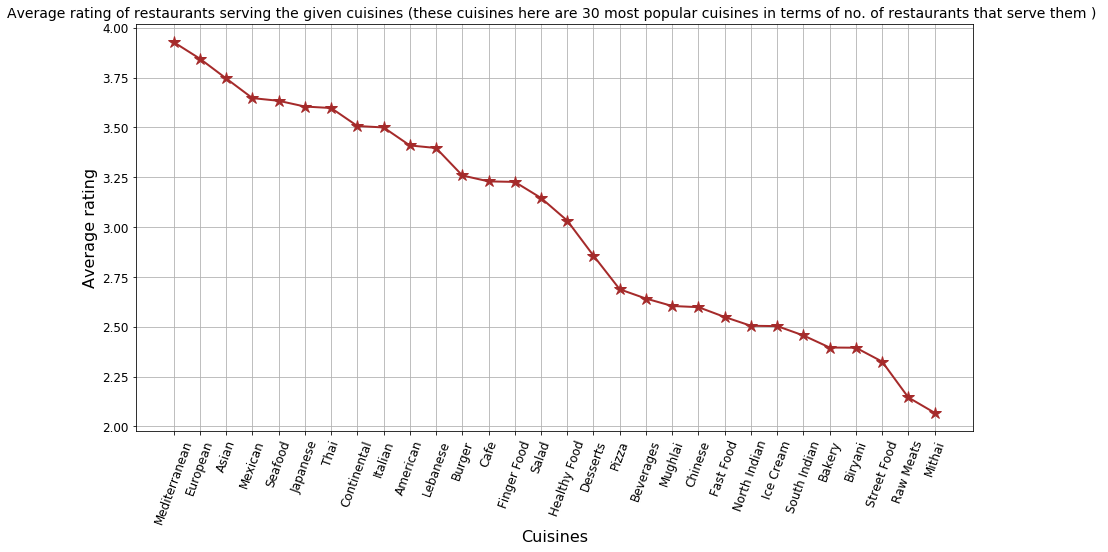

In [139]:
df = df_original.copy()
df = df[df['Country Code'] == 1]

## converting Cuisines column values to string type 
def convert(c):
    return str(c)
df.Cuisines = df.Cuisines.apply(convert)

## d will have keys as Cuisine and value as no. of restaurants that serve this cuisine
d = {}
for c, r in zip(df['Cuisines'] , df['Aggregate rating']):
    c = c.split(',')
    c = list(map(str.strip , c))
    for cui in c:
        d[cui] = d.get(cui,0) + 1

## sorting d in descending order of its values
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1] , reverse = True)}

## l will store names of top 30 most popular cuisines in terms of no. of restaurants that serve them 
l = []
c = 0
for k in d:
    if c == 30:
        break
    ## As dictionary d has cuisine name as keys and d is sorted in descending order of values , 
    ## so top 30 keys will give actually top 30 most popular cuisines
    l.append(k)
    c += 1

## Printing list l
print('Top 30 Most popular cuisines in India in terms of no. of restaurants that serve them :')
print()
print(l)
print()

## Again iterating but this time we have top 30 most popular cuisines in list l , so we will find sum of ratings of 
## restaurant serving a cuisine and no. of restaurants that serve that serve that cuisine as two values and key as
## Cuisine name and store all this in dict dic
dic = defaultdict(dict)
for c, r in zip(df['Cuisines'] , df['Aggregate rating']):
    c = c.split(',')
    c = list(map(str.strip , c))
    for cui in c:
        if cui in l:
            if cui in dic:
                dic[cui][0] = dic[cui][0] + r
                dic[cui][1] += 1
            else:
                dic[cui][0] = 0
                dic[cui][1] = 0
                
## dic2 will have key cuisine and value as average rating of all restaurants serving this cuisine 
dic2 = {}
for k in dic:
    ## to avoid divide by 0 exception
    if dic[k][1] != 0:
        ## dic[k][0] will have sum of all aggregate ratings and dic[k][1] will have total no. of ratings 
        ## so dividing both will give us required avergae rating of restaurant for the cuisine k as key
        dic2[k] = dic[k][0]/dic[k][1]

## sorting dic2 in descending order of its values i.e. average ratings 
dic2 = {k: v for k, v in sorted(dic2.items(), key=lambda item: item[1] , reverse = True)}

## Cuisine names and average ratings of restaurants serving this cuisine is stored in both list repectively
Cuisines = []
Avg_rating = []

## Printing dic2 dictionary 
print('Top 30 cuisines in descending order of avg. rating of restaurants that serve them :')
print()
for k in dic2:
    Cuisines.append(k)
    Avg_rating.append(dic2[k])
    print(k , dic2[k])

## Plotting line chart 
plt.rcParams['figure.figsize'] = (15,7.5)
plt.plot(Cuisines , Avg_rating ,'-*', linewidth = 2 , markersize = 12 , color = 'brown')
plt.xticks(rotation = 70 , fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Average rating of restaurants serving the given cuisines (these cuisines here are 30 most popular cuisines in terms of no. of restaurants that serve them ) ' , fontsize = 14)
plt.grid()
plt.xlabel('Cuisines' , fontsize = 16)
plt.ylabel('Average rating' , fontsize = 16)
plt.show()


### 2.5  Weighted restaurant rating of each locality.

In [140]:
df = df_original.copy()
df = df[df['Country Code'] == 1]
## Formula : Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes)

## Votes are 0 in 1093 rows , ignoring all such rows 

df = df[df['Votes']!=0]

## creating a new column rating_locality which is product of rating and votes 
df['rating_locality'] = df.apply(lambda row : row['Aggregate rating']*row['Votes'] , axis = 1)

## adding rating_locality values locality wise 
n_index_value = df.groupby('Locality')['rating_locality'].sum()

## n is here numerator of our formula of weighted restaurant rating
n = n_index_value.values

## it stores each locality name
locality = n_index_value.index

## d is here denominator of our formula of weighted restaurant rating
d = df.groupby('Locality')['Votes'].sum().values

## finally , weighted_rating stores weighted restaurant rating
weighted_rating = np.divide(n,d)

## mapping locality to its respective weighted restaurant rating
s = pd.Series(locality , index = weighted_rating)

## sorting in descending order of weighted rest. rating
s.sort_index(ascending = False , inplace = True)

## printing locality wise weighted res. rating of all localities .
w_rating = s.index.tolist()
locality = s.values.tolist()
for i , j in zip(locality , w_rating):
    print(i ,':', j)



Hotel Clarks Amer, Malviya Nagar : 4.9
Aminabad : 4.9
Friends Colony : 4.886916367367881
Powai : 4.841868613138686
Kirlampudi Layout : 4.820161290322581
Deccan Gymkhana : 4.8
Express Avenue Mall,  Royapettah : 4.8
Banjara Hills : 4.7187617260787995
Sector 5, Salt Lake : 4.707022552098202
Riverside Mall, Gomti Nagar : 4.7
Jubilee Hills : 4.623518181818182
Borivali West : 4.60190856635597
New BEL Road : 4.6
Gandhipuram : 4.6
JP Nagar : 4.6
Kilpauk : 4.6
Chittoor Road : 4.6
Sainikpuri : 4.6
Cavelossim : 4.6
CMR Central Mall, Maddilapalem : 4.6
Arambol : 4.6
Kidderpore : 4.6
Shastri Nagar : 4.6
Marathahalli : 4.57508238276299
Anjuna : 4.5446681580909765
Indiranagar : 4.541504487244126
Saibaba Colony : 4.532541567695962
Panaji : 4.524134660976767
Ulubari : 4.513896457765668
Koramangala 7th Block : 4.5
R Deccan Mall, JM Road : 4.5
Pratap Nagar : 4.5
Balewadi High Street, Balewadi : 4.5
Phoenix Market City, Viman Nagar : 4.5
Prahlad Nagar : 4.5
Kasbah, Greater Kailash (GK) 1 : 4.5
Koramangala

Sector 51 : 2.9640699523052465
Greater Noida : 2.9613598673300165
IP Extension : 2.954970059880239
Shanti Niketan Marg : 2.952631578947368
Shipra Mall, Indirapuram : 2.9493292053663573
South City 2 : 2.9419999999999997
Sector 21 : 2.933009708737864
Sarita Vihar : 2.927322404371585
Vasundhara Enclave : 2.9246200607902737
Mayur Vihar Phase 3 : 2.9184397163120566
Harsha Mall, Greater Noida : 2.9148148148148145
Prashant Vihar : 2.913385826771654
Durga Puri : 2.9
Dr. Zakir Hussain Marg : 2.9
Sector 55 : 2.9
Sector 72 : 2.895273631840797
Sector 46 : 2.8807692307692307
District Centre, Janakpuri : 2.8804670912951162
Tilak Nagar : 2.87923076923077
Sector 47 : 2.878787878787879
Naraina : 2.876486486486487
Supertech Shopprix Mall, Sector 61 : 2.876074498567335
Asaf Ali Road : 2.8722222222222222
The India Mall, New Friends Colony : 2.8562628336755647
Best Western Skycity Hotel, Sector 15, Gurgaon : 2.8535714285714286
Sector 57 : 2.8406779661016945
Vyapar Kendra, Palam Vihar : 2.838095238095238
Se

### 2.6 Top 10 localities with more weighted restaurant rating

Hotel Clarks Amer, Malviya Nagar : 4.9
Aminabad : 4.9
Friends Colony : 4.886916367367881
Powai : 4.841868613138686
Kirlampudi Layout : 4.820161290322581
Deccan Gymkhana : 4.8
Express Avenue Mall,  Royapettah : 4.8
Banjara Hills : 4.7187617260787995
Sector 5, Salt Lake : 4.707022552098202
Riverside Mall, Gomti Nagar : 4.7


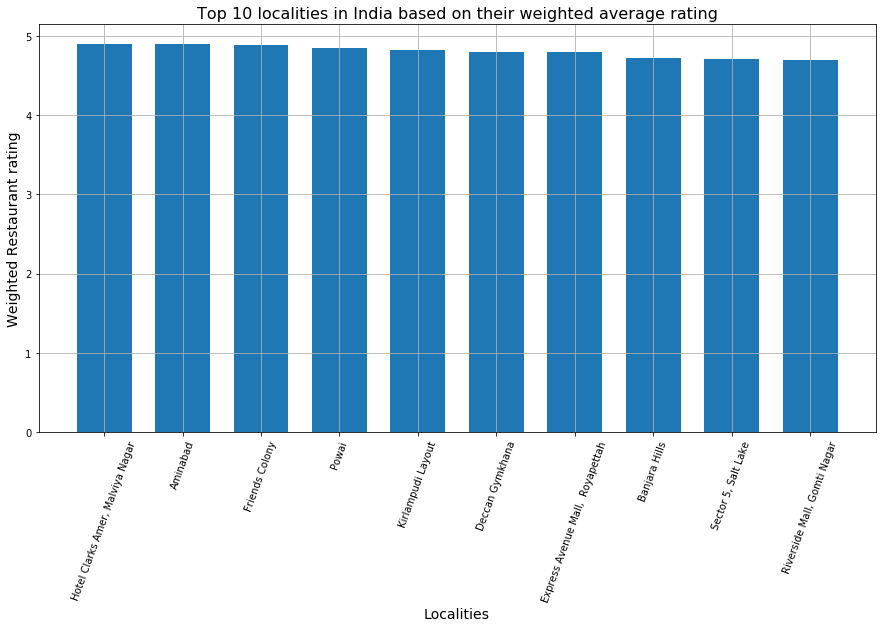

In [141]:
## Plotting bar graph for  Top 10 localities with more weighted restaurant rating based on our findings from last query
plt.title('Top 10 localities in India based on their weighted average rating' ,fontsize = 16)
c = 0
for i , j in zip(locality , w_rating):
    if c==10:
        break;
    print(i ,':', j)
    c += 1
plt.bar( s.values[0:10] , s.index[0:10] , width = 0.7)
plt.grid()
plt.ylabel('Weighted Restaurant rating' , fontsize = 14)
plt.xlabel('Localities' , fontsize = 14)
plt.xticks(rotation = 70)
plt.show()

### 3.1 Top 15 restaurants have a maximum number of outlets.

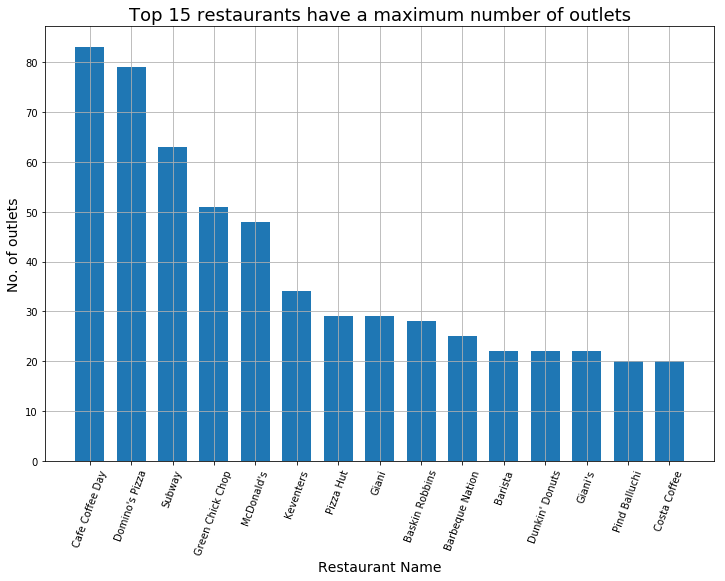

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           29
Giani               29
Baskin Robbins      28
Barbeque Nation     25
Barista             22
Dunkin' Donuts      22
Giani's             22
Pind Balluchi       20
Costa Coffee        20
Name: Restaurant Name, dtype: int64


In [142]:
df = df_original.copy()
df = df[df['Country Code'] == 1]

## restaurant Name wise top 15 restaurants having maximum no. of outlets 
r = df['Restaurant Name'].value_counts()[0:15]

## x stores restaurant name
x = r.index

## y stores no. of outlets
y = r.values

## plotting the graph .
plt.rcParams['figure.figsize'] = (12,8)
plt.bar(x,y,width = 0.7)
plt.title('Top 15 restaurants have a maximum number of outlets' , fontsize = 18)
plt.xlabel('Restaurant Name' , fontsize = 14)
plt.ylabel('No. of outlets' , fontsize = 14)
plt.xticks(rotation = 70)
plt.grid()
plt.show()

print(r)


 ### 3.2 Histogram of aggregate rating of restaurants .

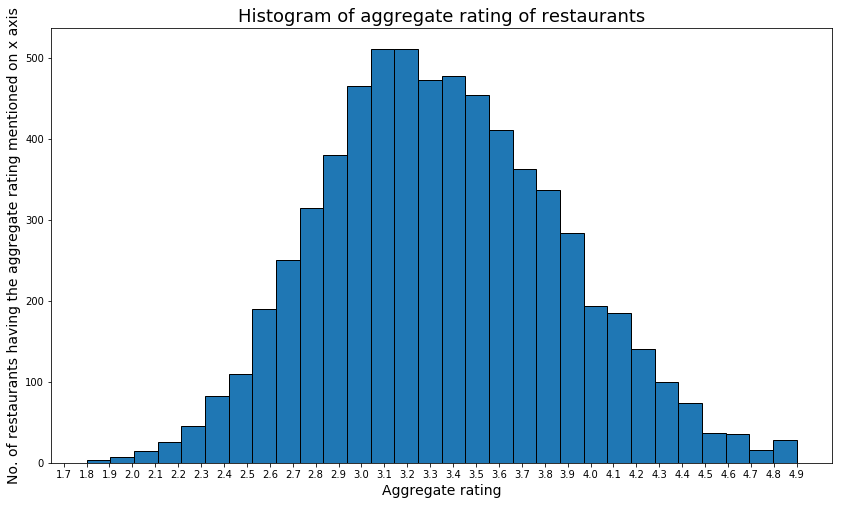

In [143]:
df = df_original.copy()
df = df[df['Country Code'] == 1]

## ignoring the unrated restaurants
df = df[df['Aggregate rating']!=0]

## plotting the histogram taking 30 bins
plt.rcParams['figure.figsize'] = (14,8)

## setting xticks from 0-5 with 0.1 step size as it denoted rating
plt.xticks(np.arange(0,5,0.1))
plt.title('Histogram of aggregate rating of restaurants' , fontsize = 18)
plt.xlabel('Aggregate rating' , fontsize = 14)
plt.ylabel('No. of restaurants having the aggregate rating mentioned on x axis' , fontsize = 14)
plt.hist(df['Aggregate rating'] , edgecolor = 'black' , bins = 30)
plt.show()


### 3.3 Top 10 restaurants in the data with the highest number of votes .

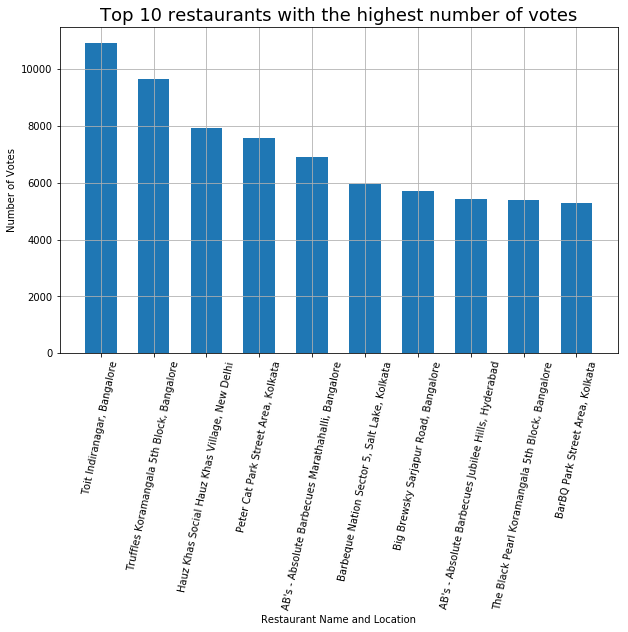

Toit Indiranagar, Bangalore : 10934 votes
Truffles Koramangala 5th Block, Bangalore : 9667 votes
Hauz Khas Social Hauz Khas Village, New Delhi : 7931 votes
Peter Cat Park Street Area, Kolkata : 7574 votes
AB's - Absolute Barbecues Marathahalli, Bangalore : 6907 votes
Barbeque Nation Sector 5, Salt Lake, Kolkata : 5966 votes
Big Brewsky Sarjapur Road, Bangalore : 5705 votes
AB's - Absolute Barbecues Jubilee Hills, Hyderabad : 5434 votes
The Black Pearl Koramangala 5th Block, Bangalore : 5385 votes
BarBQ Park Street Area, Kolkata : 5288 votes


In [144]:
df = df_original.copy()
df = df[df['Country Code'] == 1]

## restaurant Id wise calculating no. of votes , also obtaining restaurant name and locality for clarity as there can 
## be multiple branches of a restaurant with same name . 
iv = df.groupby(['Restaurant ID' , 'Restaurant Name' , 'Locality Verbose'])['Votes'].sum().sort_values(ascending = False)[0:10]

## tt stores Restaurant ID , 'Restaurant Name' , 'Locality Verbose' , separating res id and clubbing other two as one 
## name in other list x 
tt = iv.index.tolist()
x = []
for name in tt:
    e = str(name[1]) + ' ' + str(name[2])
    x.append(e)

## plotting the bar graph
plt.rcParams['figure.figsize'] = (10,6)
plt.bar(x , iv.values , width = 0.6)
plt.title('Top 10 restaurants with the highest number of votes' , fontsize = 18)
plt.ylabel('Number of Votes')
plt.xlabel('Restaurant Name and Location')
plt.xticks(rotation = 78)
plt.grid()
plt.show()

## printing required restaurant names and locality with no. of votes 
for ele ,v in zip(x , iv.values):
    print(ele ,':',v , 'votes')


### 3.4 Top 10 cuisines present in restaurants in the USA .

In [145]:
df = df_original.copy()
df = df[df['Country Code'] == 216]

## as for usa cuisines column have 9 null values dropping them
df.dropna(subset = ["Cuisines"] , inplace = True)

## usa dict stores cuisine name as key and no. of rest. serving it as value 
usa = {}
for cui in df.Cuisines:
    cui = cui.split(',')
    cui = list(map(str.strip , cui))
    for c in cui:
        usa[c] = usa.get(c,0) + 1

## sorting dict in descending order of its values 
usa = {k: v for k, v in sorted(usa.items(), key=lambda item: item[1] , reverse = True)}

## these 2 lists each store cuisine , its count in USA
usa_cuisine = []
usa_cuisine_count = []

count = 0
print('Top 10 cuisines served in the United States Of America :')
for k,v in usa.items():
    if(count == 10):
        break
    print(k)
    usa_cuisine.append(k)
    usa_cuisine_count.append(v)
    count += 1

## converting to numpy array to make calculations of % further easy 
usa_cuisine_count = np.array(usa_cuisine_count)


Top 10 cuisines served in the United States Of America :
American
Seafood
Burger
Sandwich
Pizza
Steak
Italian
Breakfast
Mexican
Sushi


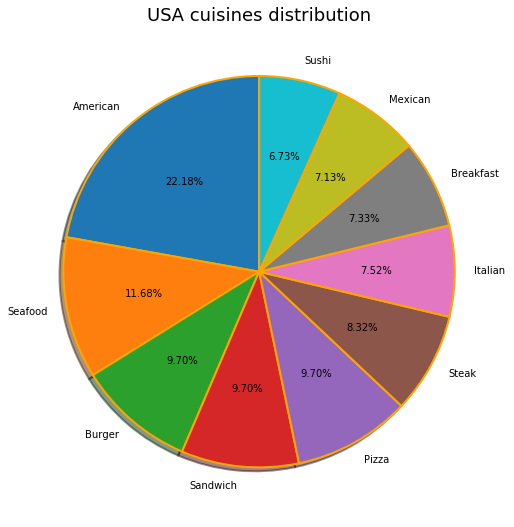

American 22.18 %
Seafood 11.68 %
Burger 9.70 %
Sandwich 9.70 %
Pizza 9.70 %
Steak 8.32 %
Italian 7.52 %
Breakfast 7.33 %
Mexican 7.13 %
Sushi 6.73 %


In [146]:
## plotting the pie chart 
plt.rcParams['figure.figsize'] = (15,9)
plt.title('USA cuisines distribution' , fontsize = 18)
plt.pie(usa_cuisine_count , labels = usa_cuisine ,autopct='%.2f%%' , startangle = 90 ,shadow = True,wedgeprops   = { 'linewidth' : 2,'edgecolor' : "orange" })
plt.show()
## calculating percentage share of each cuisine.
peramount1 = np.true_divide(usa_cuisine_count , usa_cuisine_count.sum())*100

## printing percentage share of each cuisine .
for i in range(10):
    print(usa_cuisine[i] , format(peramount1[i] ,'.2f') , '%')

### 3.5 Bubble graph of a number of Restaurants present in each city of India and keeping the weighted restaurant rating of the city in a bubble .

In [147]:
df = df_original.copy()
df = df[df['Country Code'] == 1]

## ignoring rows where votes are 0
df = df[df['Votes']!=0]

## ## creating a new column rating_locality which is product of rating and votes
df['rating_locality'] = df.apply(lambda row : row['Aggregate rating']*row['Votes'] , axis = 1)

## citywise calculating sum of rating_locality values
n_index_value = df.groupby('City')['rating_locality'].sum()

## n is numerator of our formula of weighted restaurant rating
n = n_index_value.values

## it stores city names
locality = n_index_value.index

## d is denominator of our formula of weighted restaurant rating
d = df.groupby('City')['Votes'].sum().values

## stores weighted_res. rating citywise
weighted_rating = np.divide(n,d)

## mapping a city to its weighted rest. rating
s = pd.Series(locality , index = weighted_rating)

## sorting in descending order of weighted rest. ratings.
s.sort_index(ascending = False , inplace = True)

## obtaining city names and respective ratings in 2 lists
w_rating = s.index.tolist()
locality = s.values.tolist()

## Printing weighted rest. rating of all indian cities 
print('City        ' , ':' , 'Weighted restaurant Rating of each city in descending order')
print()
for i , j in zip(locality , w_rating):
    print(i ,':', j)


City         : Weighted restaurant Rating of each city in descending order

Secunderabad : 4.548054679284963
Bangalore : 4.497423148890671
Hyderabad : 4.487772943857468
Lucknow : 4.3235268346111715
Chennai : 4.319682253114281
Mohali : 4.3
Kolkata : 4.295151705424619
Pune : 4.2839957553540415
Jaipur : 4.281507965242579
Guwahati : 4.265733279613215
Mumbai : 4.2166077381553695
Panchkula : 4.2
Coimbatore : 4.174994074425219
Ahmedabad : 4.163215392140877
Goa : 4.158438203735593
Kochi : 4.137380191693291
Vadodara : 4.131989247311829
Vizag : 4.131187061336588
Bhopal : 4.1259297879735835
Nagpur : 4.10865162037037
Chandigarh : 4.106690515324375
Ludhiana : 4.083607130373995
Surat : 4.017698391055359
Dehradun : 4.016172839506172
Agra : 4.00698351115422
Indore : 3.998346242411556
Bhubaneshwar : 3.9677586613245337
Kanpur : 3.853793466807166
New Delhi : 3.76587150268963
Amritsar : 3.7645839017735336
Mysore : 3.76120244246125
Mangalore : 3.761117471948706
Gurgaon : 3.7439580811138042
Puducherry : 3.7

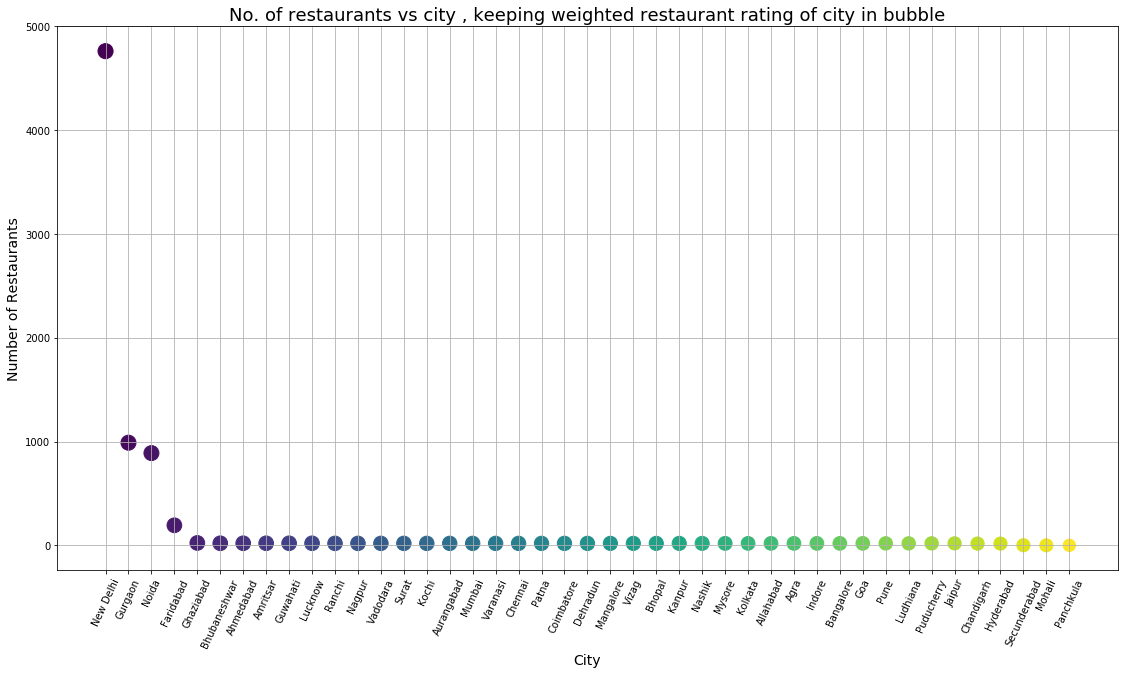

In [148]:
## plotting the required bubble chart 
## as from above output there is not much difference in weighted rest. rating of each cities and numbers of cities are 
## more so , their is not significant difference in size of bubbles is shown 
city_res = df.City.value_counts()
city = city_res.index
nor = city_res.values
plt.rcParams['figure.figsize'] = (19,10)
c = np.arange(len(city))
w_rating_numpy = np.array(w_rating)
plt.scatter(city , nor , s = (w_rating_numpy)*50 , c = c)
plt.xticks(rotation = 65)
plt.title('No. of restaurants vs city , keeping weighted restaurant rating of city in bubble' , fontsize = 18)
plt.ylabel('Number of Restaurants' , fontsize = 14)
plt.xlabel('City' , fontsize = 14)
plt.grid()
plt.show()

